In [28]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and get metadata

In [24]:

def get_metadata(path, data_type):
    image_sizes = []
    labels = []
    data_types = []
    image_paths = []

    # Iterate over each category (subdirectory)
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        
        # Iterate over each image in the category
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            
            # Skip if image is not found
            if image is None:
                continue

            original_size = image.shape  # Get the original size of the image
            
            # Append the size, label, and data type to the lists
            image_sizes.append(original_size)
            labels.append(category)
            data_types.append(data_type)
            image_paths.append(image_path)


    return image_paths, image_sizes, labels, data_types

# Paths to the datasets
path_train = ('../data/raw/Training')
path_test = ('../data/raw/Testing')

# Process each dataset
train_paths, train_sizes, train_labels, train_data = process_images(path_train, 'train')
test_paths, test_sizes, test_labels, test_data = process_images(path_test, 'test')

# Combine the data from train and test sets
all_paths = train_paths + test_paths
all_sizes = train_sizes + test_sizes
all_labels = train_labels + test_labels
all_data = train_data + test_data


# Create a DataFrame
df = pd.DataFrame({
    'Path': all_paths,
    'Label': all_labels,
    'Original_Size': all_sizes,
    'Data': all_data
})

# Optionally, save the DataFrame to a CSV file
df.to_csv('../reports/image_sizes_labels_and_data.csv', index=False)


In [38]:
def get_metadata(path, data_type):
    image_sizes = []
    image_areas = []  # List to store the area of each image
    labels = []
    data_types = []
    image_paths = []

    # Iterate over each category (subdirectory)
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        
        # Iterate over each image in the category
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            
            # Skip if image is not found
            if image is None:
                continue

            original_size = image.shape  # Get the original size of the image
            area = original_size[0] * original_size[1]  # Calculate the area (width x height)

            # Append the size, area, label, data type, and path to the lists
            image_sizes.append(original_size)
            image_areas.append(area)
            labels.append(category)
            data_types.append(data_type)
            image_paths.append(image_path)

    return image_paths, image_sizes, image_areas, labels, data_types

# Paths to the datasets
path_train = '../data/raw/Training'
path_test = '../data/raw/Testing'

# Process each dataset
train_paths, train_sizes, train_areas, train_labels, train_data = get_metadata(path_train, 'train')
test_paths, test_sizes, test_areas, test_labels, test_data = get_metadata(path_test, 'test')

# Combine the data from train and test sets
all_paths = train_paths + test_paths
all_sizes = train_sizes + test_sizes
all_areas = train_areas + test_areas
all_labels = train_labels + test_labels
all_data = train_data + test_data

# Create a DataFrame
df = pd.DataFrame({
    'Path': all_paths,
    'Data': all_data,
    'Label': all_labels,
    'Original_Size': all_sizes,
    'Area': all_areas
})

# Optionally, save the DataFrame to a CSV file
df.to_csv('../reports/image_sizes_labels_and_data.csv', index=False)


In [39]:
df.head()

,Path,Data,Label,Original_Size,Area
0,../data/raw/Training/pituitary/Tr-pi_0505.jpg,train,pituitary,"(512, 512, 3)",262144
1,../data/raw/Training/pituitary/Tr-pi_0263.jpg,train,pituitary,"(512, 512, 3)",262144
2,../data/raw/Training/pituitary/Tr-pi_0277.jpg,train,pituitary,"(512, 512, 3)",262144
3,../data/raw/Training/pituitary/Tr-pi_1169.jpg,train,pituitary,"(512, 512, 3)",262144
4,../data/raw/Training/pituitary/Tr-pi_0511.jpg,train,pituitary,"(512, 512, 3)",262144


### EDA

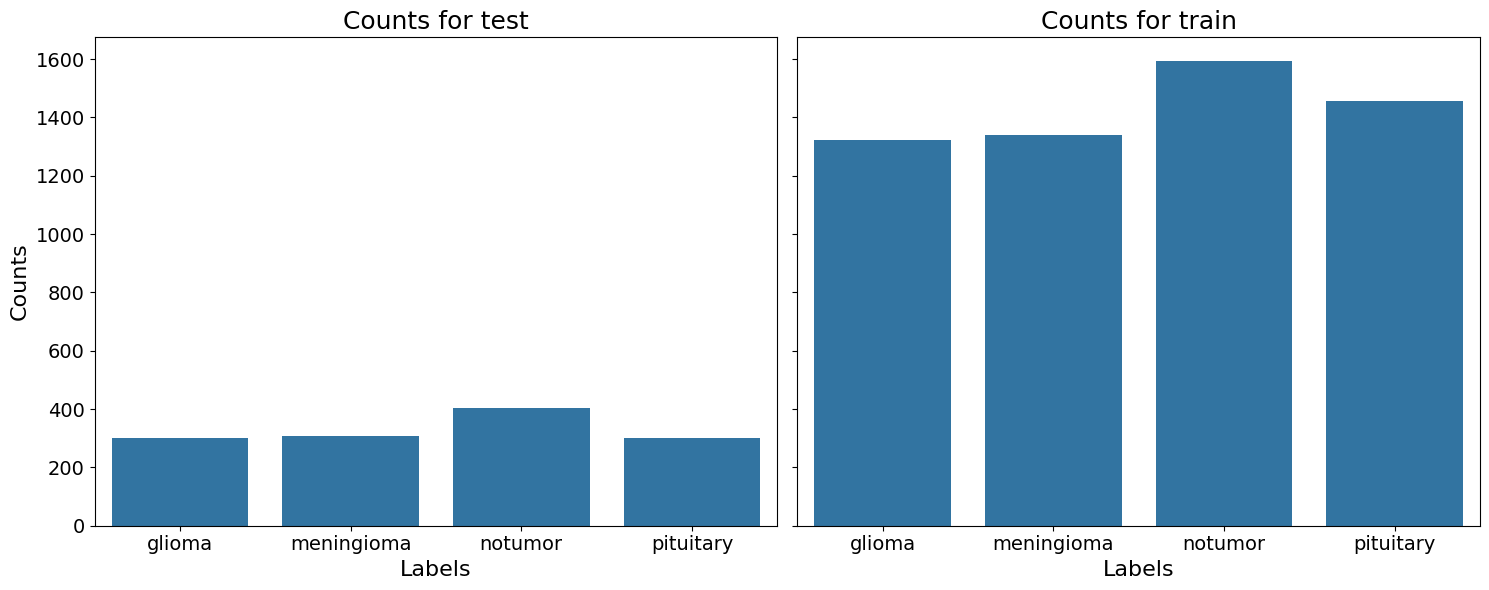

In [40]:

# Get the counts
grouped_counts = df.groupby('Data')['Label'].value_counts().unstack(0).fillna(0)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for each category in 'Data'
for i, (data_category, counts) in enumerate(grouped_counts.items()):
    sns.barplot(ax=axes[i], x=counts.index, y=counts.values)
    axes[i].set_title(f'Counts for {data_category}', fontsize=18)
    axes[i].set_xlabel('Labels', fontsize=16)
    axes[i].set_ylabel('Counts', fontsize=16)
    axes[i].tick_params(labelsize=14)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('../reports/visualizations/label_counts_barplot.png')

# Show the plot
plt.show()


<Axes: xlabel='Area', ylabel='Density'>

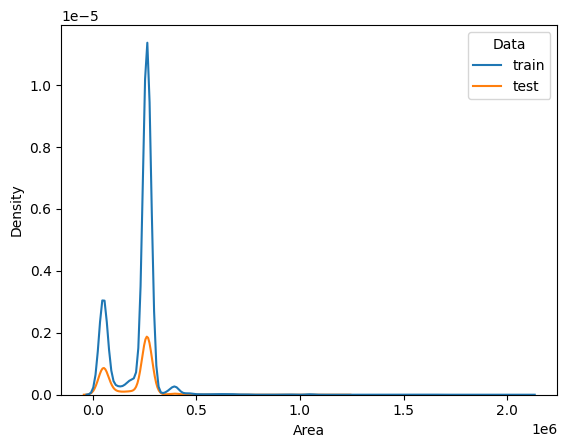

In [46]:
# Plot the histogram of the areas for train and test
sns.kdeplot(data=df, x='Area', hue='Data', log_scale=False)


In [51]:
# Describe the areas for train and test sets separately without log scale, as integers
df.groupby(['Data', 'Label'])['Area'].describe().astype(int)


count    mean     std     min     25%     50%     75%  \
Data  Label                                                               
test  glioma        300  262144       0  262144  262144  262144  262144   
      meningioma    306  209730  105381   40020  122492  262144  262144   
      notumor       405   88348   82973   29700   50388   50625   63720   
      pituitary     300  259522   22588   65536  262144  262144  262144   
train glioma       1321  262144       0  262144  262144  262144  262144   
      meningioma   1339  249646   73383   39240  262144  262144  262144   
      notumor      1595  124770  154623   29700   50388   50625  168744   
      pituitary    1457  261430   65343   40804  262144  262144  262144   

                      max  
Data  Label                
test  glioma       262144  
      meningioma  1170831  
      notumor      462400  
      pituitary    262144  
train glioma       262144  
      meningioma  1819425  
      notumor     2073600  
      pituitary   1863225

In [25]:
# Calculate the area of each image (width x height)
df['Area'] = df['Original_Size'].apply(lambda x: x[0] * x[1])

# Find the biggest and smallest image sizes
biggest_image_size = df[df['Area'] == df['Area'].max()]['Original_Size'].iloc[0]
smallest_image_size = df[df['Area'] == df['Area'].min()]['Original_Size'].iloc[0]

# Find the paths of the biggest and smallest images
biggest_image_path = df.loc[df['Area'].idxmax(), 'Path']
smallest_image_path = df.loc[df['Area'].idxmin(), 'Path']

print("Biggest Image Size:", biggest_image_size)
print("Smallest Image Size:", smallest_image_size)

Biggest Image Size: (1080, 1920, 3)
Smallest Image Size: (198, 150, 3)


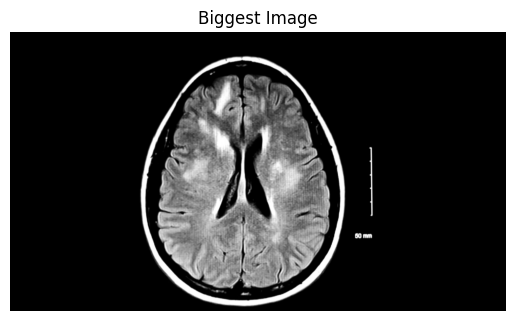

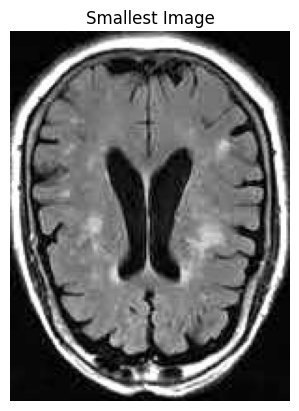

In [26]:

# Function to display an image
def display_image(image_path, title):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the biggest and smallest images
display_image(biggest_image_path, "Biggest Image")
display_image(smallest_image_path, "Smallest Image")